<a href="https://colab.research.google.com/github/AHD-12/Cnn_Ahd_Model/blob/main/cnn_ahd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

## Noramalize the inputs from 0-255 between 0-1 by diciding by 255


In [4]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train /255.0
X_test = X_test /255.0

## One_hot encode output

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [7]:
num_classes = y_test.shape[1]

## Building the Model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape= X_train.shape[1:]))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,738 (1.50 MB)

 Trainable params: 393,738 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size= 64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5767 - loss: 1.1941 - val_accuracy: 0.6567 - val_loss: 0.9780
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7017 - loss: 0.8560 - val_accuracy: 0.7075 - val_loss: 0.8318
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7630 - loss: 0.6838 - val_accuracy: 0.7476 - val_loss: 0.7331
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8020 - loss: 0.5725 - val_accuracy: 0.7500 - val_loss: 0.7375
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8343 - loss: 0.4762 - val_accuracy: 0.7657 - val_loss: 0.7131
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8597 - loss: 0.4041 - val_accuracy: 0.7549 - val_loss: 0.7535
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8827 - loss: 0.3385 - val_accuracy: 0.7732 - val_loss: 0.7586
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9061 - loss: 0.2685 - val_accuracy:

<Axes: >

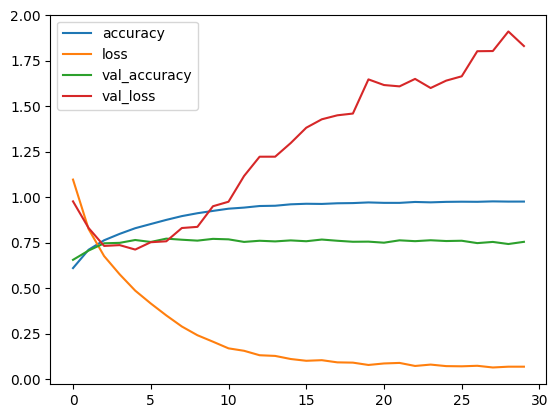

In [30]:
pd.DataFrame(history.history).plot()

## Chane model to fix overfiting problem and some dropout and batchnormaliztion

In [35]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape= X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,082 (1.54 MB)

 Trainable params: 398,410 (1.52 MB)

 Non-trainable params: 4,672 (18.25 KB)

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size= 64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.3661 - loss: 1.8217 - val_accuracy: 0.5917 - val_loss: 1.1535
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5887 - loss: 1.1463 - val_accuracy: 0.6441 - val_loss: 1.0093
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6712 - loss: 0.9331 - val_accuracy: 0.7105 - val_loss: 0.8269
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7079 - loss: 0.8271 - val_accuracy: 0.7478 - val_loss: 0.7178
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7309 - loss: 0.7682 - val_accuracy: 0.7635 - val_loss: 0.6863
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7477 - loss: 0.7164 - val_accuracy: 0.7555 - val_loss: 0.7017
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7624 - loss: 0.6829 - val_accuracy: 0.7929 - val_loss: 0.6065
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7724 - loss: 0.6495 - val_accuracy: 

<Axes: >

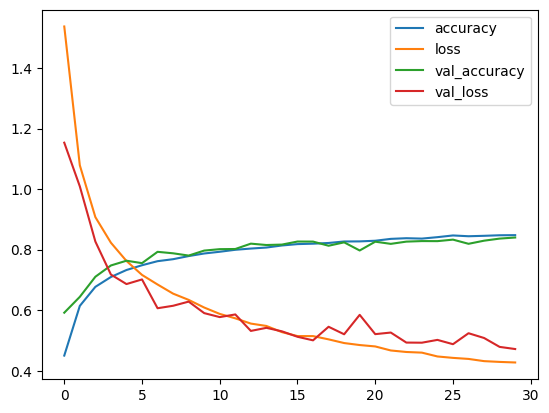

In [39]:
pd.DataFrame(history.history).plot()

## save virsion of that for later

In [41]:
model.save("cnn_Ahd_v1.h5")

In [43]:
ahd = load_model("cnn_Ahd_v1.h5")

## Now test my model in real data

In [45]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [44]:
ahd.predict(X_test[0:10])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


array([7.4814627e-05, 2.7059083e-05, 1.0745857e-04, 9.7643697e-01,
       1.2083003e-05, 1.4957825e-02, 8.0560613e-03, 1.1104856e-05,
       3.0462642e-04, 1.2118756e-05], dtype=float32)

In [47]:
labels[3]

'cat'

In [48]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## Predicting test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


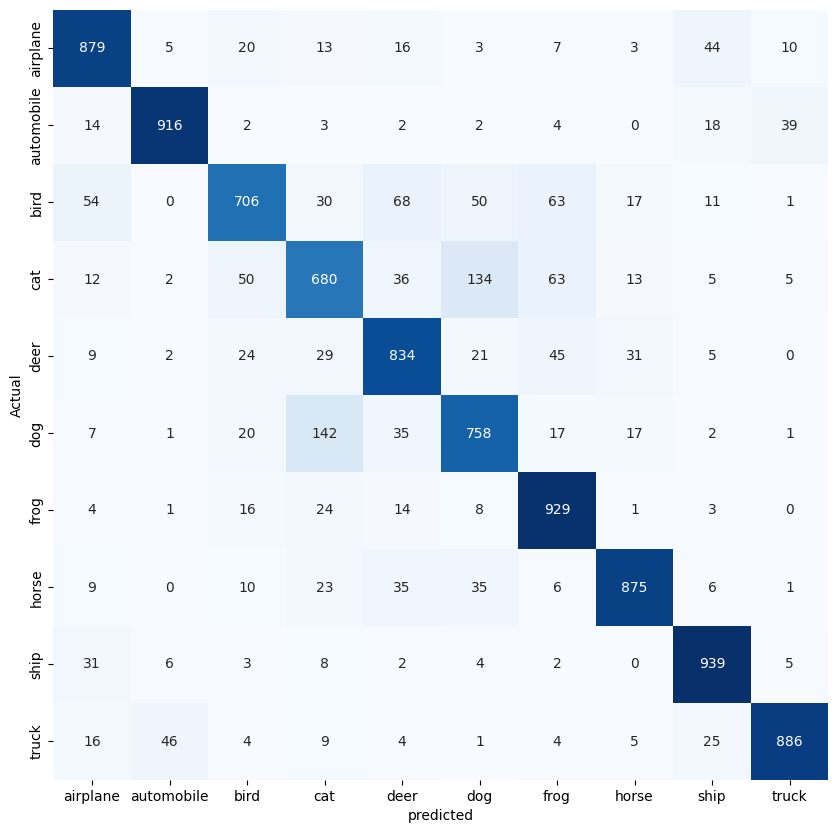

In [54]:
predictions_proba = ahd.predict(X_test)
predictions_labels = np.argmax(predictions_proba, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

#Creating confusion matrix

cm = confusion_matrix(y_test_labels, predictions_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm, cbar=False, xticklabels= labels, yticklabels= labels, fmt= "d", annot=True, cmap= plt.cm.Blues)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

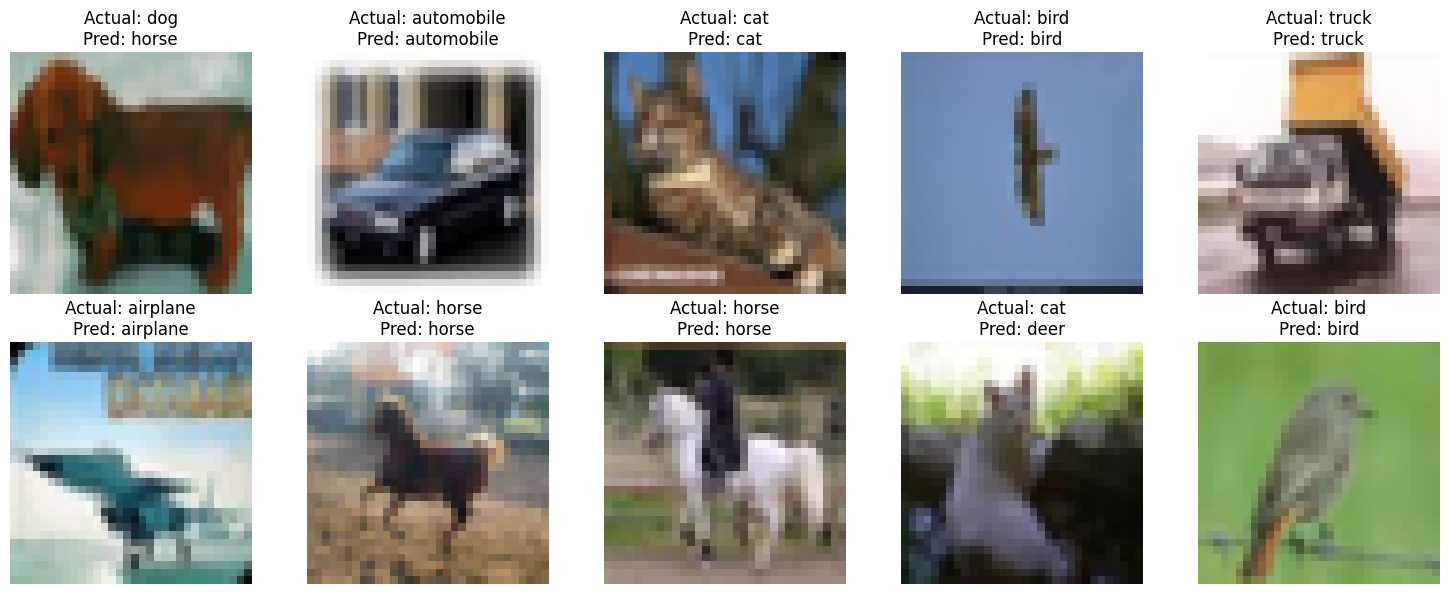

In [67]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) # Adjust figure size to accommodate 10 images

for i in range(10):
    # Select a random image from the test dataset
    random_index = np.random.randint(0, len(X_test))
    random_image = X_test[random_index]
    actual_label_one_hot = y_test[random_index]

    # Reshape the image to fit the model's input expectations (add batch dimension)
    image_for_prediction = np.expand_dims(random_image, axis=0)

    # Make a prediction using the trained model
    prediction_probabilities = ahd.predict(image_for_prediction, verbose=0) # verbose=0 to suppress per-image prediction output
    predicted_class_index = np.argmax(prediction_probabilities)
    predicted_label = labels[predicted_class_index]

    # Get the actual label
    actual_class_index = np.argmax(actual_label_one_hot)
    actual_label = labels[actual_class_index]

    plt.subplot(2, 5, i + 1) # Create a 2x5 grid of subplots
    plt.imshow(random_image) # X_test is already normalized, matplotlib handles 0-1 range
    plt.title(f"Actual: {actual_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout() # Adjust layout to prevent titles from overlapping
plt.show()

# You can uncomment these lines if you want to see raw probabilities for one random image
# print(f"Model's raw predictions (probabilities for the last displayed image): {prediction_probabilities[0]}")
# print(f"Actual Label (last displayed image): {actual_label}")
# print(f"Predicted Label (last displayed image): {predicted_label}")